<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [107]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-11-21 22:56:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  41.2MB/s    in 0.8s    

2023-11-21 22:56:35 (41.2 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [4]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()


,COUNT(*)
0,11398


## Demo: How to list all tables


In [16]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)



,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


sqlite3 your_database_file.sqlite "SELECT COUNT(*) AS NumRespondentsWithSQL FROM LanguageWorkedWith WHERE LanguageWorkedWith LIKE '%SQL%';"
## Demo: How to describe a table


In [48]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# in the list of most popular languages respondents wish to learn next year, what is the rank of Python?
table_name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# in the list of most popular languages respondents wish to learn next year, what is the rank of Python? (query)
table_name = 'LanguageDesireNextYear'
sql_query = f"""
SELECT LanguageDesireNextYear, RANK() OVER (ORDER BY COUNT(*) DESC) AS Rank
FROM {table_name}
WHERE LanguageDesireNextYear = 'Python'
GROUP BY LanguageDesireNextYear;
"""

result = pd.read_sql_query(sql_query, conn)
print("Rank of Python in the list of desired languages:", result['Rank'].values[0])



# How many respondents indicated that they currently work with 'SQL'? 
table_name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


# How many respondents indicated that they currently work with 'SQL' (query)
table_name = 'LanguageWorkedWith'
sql_query = f"""
SELECT COUNT(*) AS NumberOfRespondents
FROM {table_name}
WHERE LanguageWorkedWith LIKE '%SQL%';
"""

result = pd.read_sql_query(sql_query, conn)
print("Number of respondents working with SQL:", result['NumberOfRespondents'].values[0])


# How many respondents indicated that they work on 'MySQL' only?
table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


# How many respondents indicated that they work on 'MySQL' only? (query)
table_name = 'DatabaseWorkedWith'
sql_query = f"""
SELECT COUNT(*) AS NumberOfRespondents
FROM {table_name}
WHERE DatabaseWorkedWith LIKE 'MySQL'
   OR DatabaseWorkedWith LIKE 'MySQL,%'
   OR DatabaseWorkedWith LIKE '%,MySQL'
   OR DatabaseWorkedWith = 'MySQL';
"""

result = pd.read_sql_query(sql_query, conn)
print("Number of respondents working on MySQL only:", result['NumberOfRespondents'].values[0])











CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [49]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# in the list of most popular languages respondents wish to learn next year, what is the rank of Python?



# How many respondents indicated that they currently work with 'SQL'? 
table_name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


# How many respondents indicated that they currently work with 'SQL' (query)
table_name = 'LanguageWorkedWith'
sql_query = f"""
SELECT COUNT(*) AS NumberOfRespondents
FROM {table_name}
WHERE LanguageWorkedWith LIKE '%SQL%';
"""

result = pd.read_sql_query(sql_query, conn)
print("Number of respondents working with SQL:", result['NumberOfRespondents'].values[0])


# How many respondents indicated that they work on 'MySQL' only?
table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


# How many respondents indicated that they work on 'MySQL' only? (query)
table_name = 'DatabaseWorkedWith'
sql_query = f"""
SELECT COUNT(*) AS NumberOfRespondents
FROM {table_name}
WHERE DatabaseWorkedWith LIKE 'MySQL'
   OR DatabaseWorkedWith LIKE 'MySQL,%'
   OR DatabaseWorkedWith LIKE '%,MySQL'
   OR DatabaseWorkedWith = 'MySQL';
"""

result = pd.read_sql_query(sql_query, conn)
print("Number of respondents working on MySQL only:", result['NumberOfRespondents'].values[0])


# Majority of the survey responders are
table_name = 'DevType'
sql_query = f"""
SELECT DevType, COUNT(*) AS RespondentCount
FROM {table_name}
GROUP BY DevType
ORDER BY RespondentCount DESC
LIMIT 1;
"""

result = pd.read_sql_query(sql_query, conn)
print("Majority of survey responders:", result['DevType'].values[0])








CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


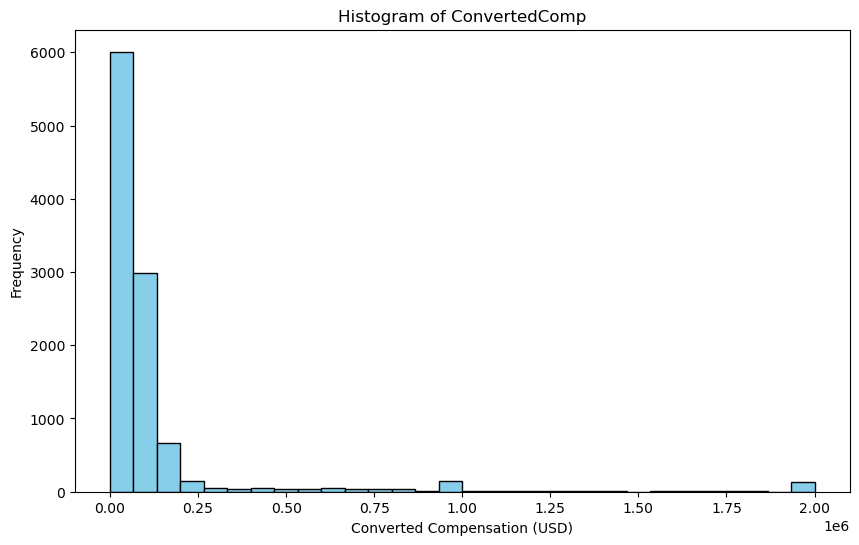

In [23]:
# Plot histogram
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT ConvertedComp FROM {}
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


### Box Plots


Plot a box plot of `Age.`


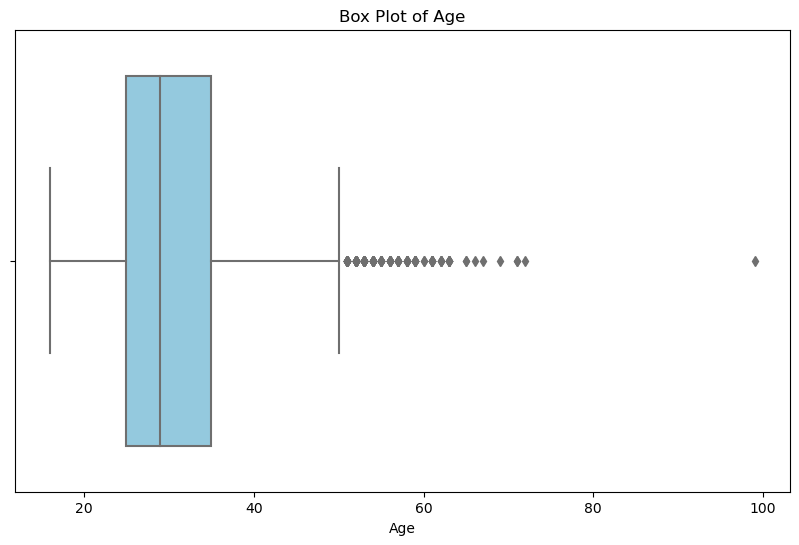

In [24]:
# Plot box plot
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT Age FROM {}
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


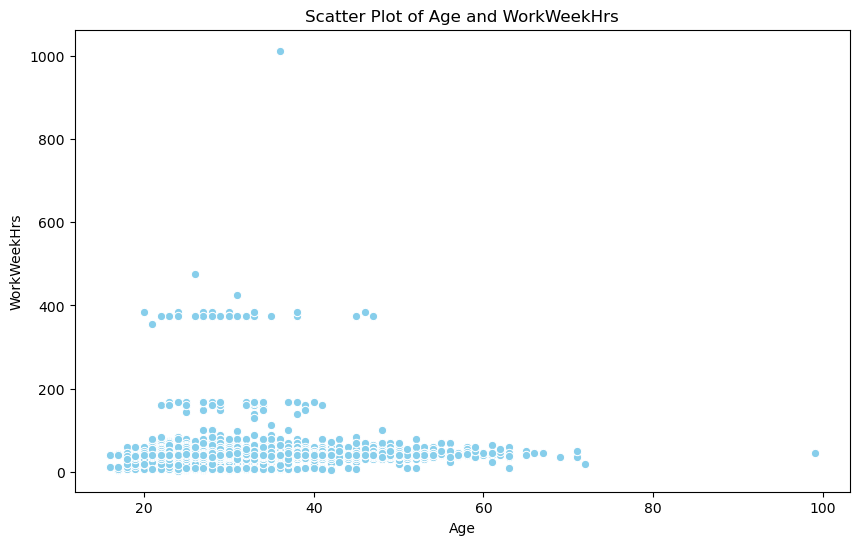

In [25]:
# Create scatter plot
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT Age, WorkWeekHrs FROM {}
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'], color='skyblue')
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


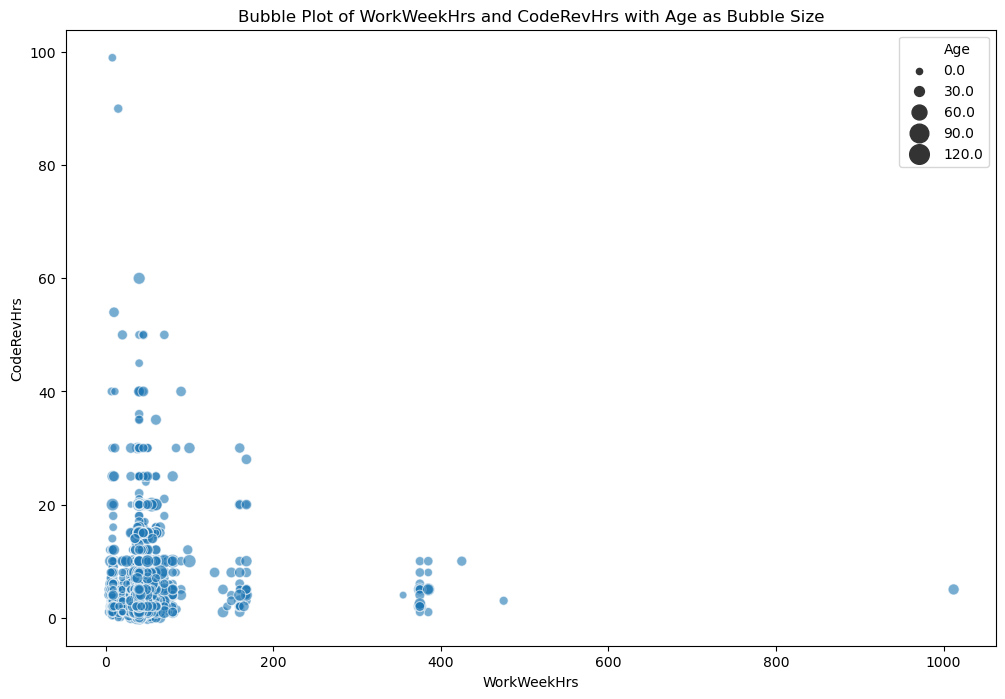

In [27]:
# Create bubble plot
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM {}
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['WorkWeekHrs'], y=df['CodeRevHrs'], size=df['Age'], sizes=(20, 200), alpha=0.6)
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs with Age as Bubble Size')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


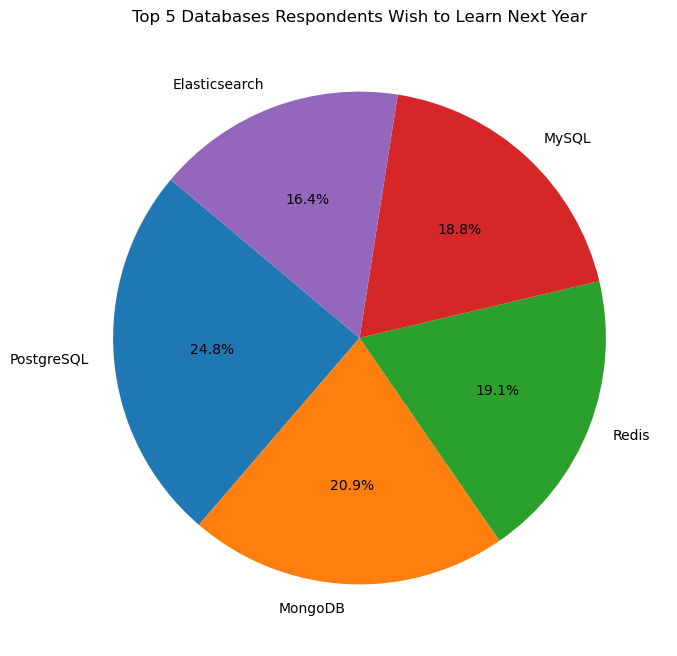

Ranking of Databases:
PostgreSQL: Rank 1
MongoDB: Rank 2
Redis: Rank 3
MySQL: Rank 4
Elasticsearch: Rank 5
Number of respondents working with SQL: 16924


In [11]:
import sqlite3
import pandas as pd

# Reopen the database connection
conn = sqlite3.connect("m4_survey_data.sqlite")


# Retrieve the top 5 databases respondents wish to learn next year
query = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

df_top_databases = pd.read_sql_query(query, conn)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_top_databases['Count'], labels=df_top_databases['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

# Print a list of databases in descending order along with their rankings
df_top_databases_ranked = df_top_databases.sort_values(by='Count', ascending=False)
print("Ranking of Databases:")
for i, row in df_top_databases_ranked.iterrows():
    print(f"{row['DatabaseDesireNextYear']}: Rank {i + 1}")



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


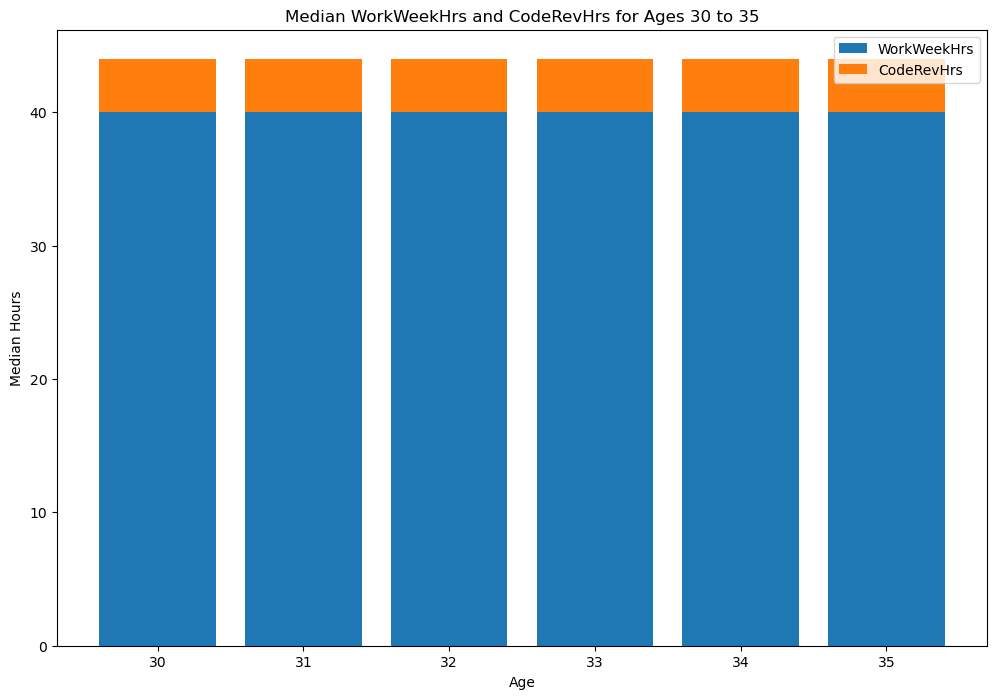

In [82]:
# Calculate the median WorkWeekHrs and CodeRevHrs for each age
median_data = df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median().reset_index()

# Plot the stacked chart
plt.figure(figsize=(12, 8))
plt.bar(median_data['Age'], median_data['WorkWeekHrs'], label='WorkWeekHrs')
plt.bar(median_data['Age'], median_data['CodeRevHrs'], bottom=median_data['WorkWeekHrs'], label='CodeRevHrs')

# Customize the plot
plt.title('Median WorkWeekHrs and CodeRevHrs for Ages 30 to 35')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.legend()
plt.show()

# Close the database connection
conn.close()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


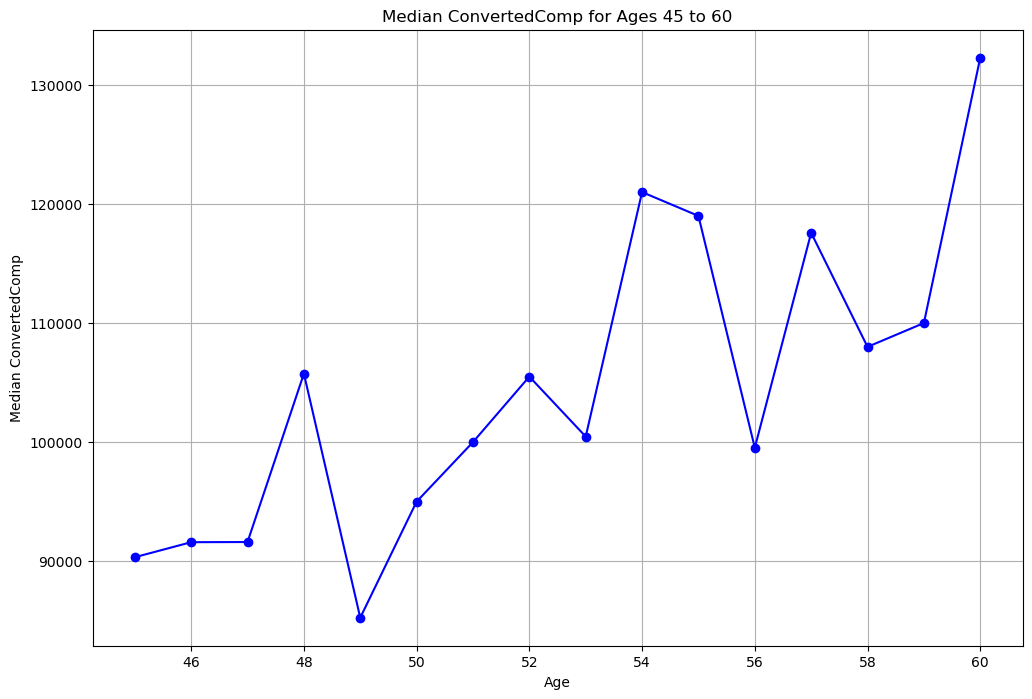

In [43]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Define the SQL query to retrieve the necessary columns
query = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 45 AND Age <= 60
"""

# Read the data from the database into a DataFrame
df = pd.read_sql_query(query, conn)

# Calculate the median 'ConvertedComp' for each age
median_data = df.groupby('Age')['ConvertedComp'].median().reset_index()

# Plot the median 'ConvertedComp'
plt.figure(figsize=(12, 8))
plt.plot(median_data['Age'], median_data['ConvertedComp'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()

# Close the database connection
conn.close()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


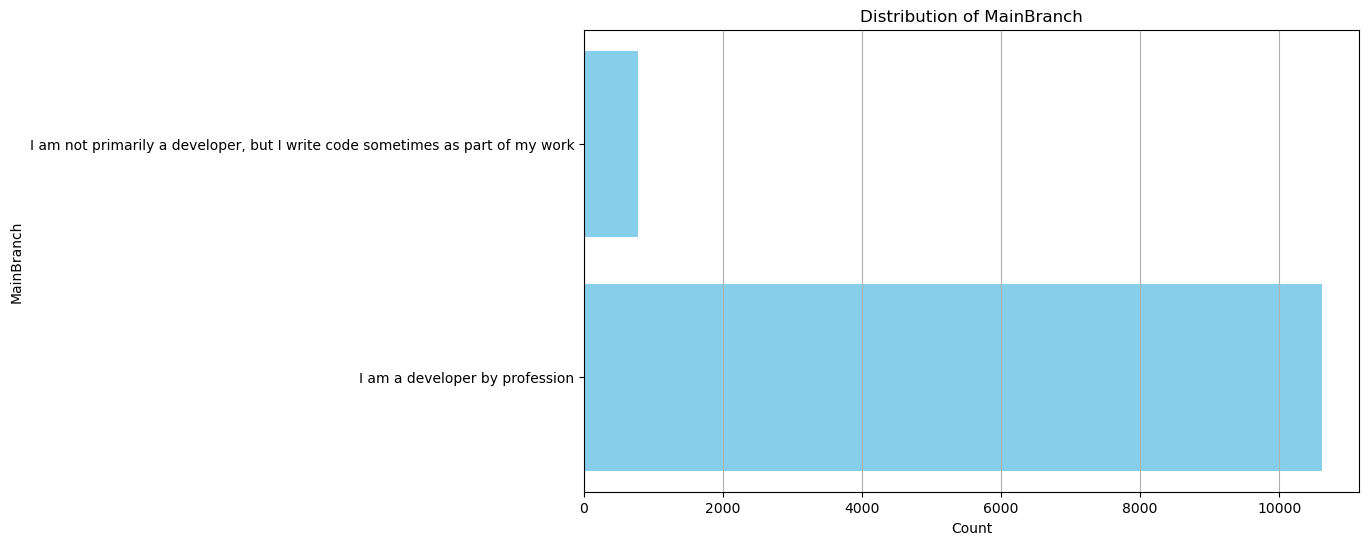

In [45]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['MainBranch'], df['Count'], color='skyblue')

# Customize the plot
plt.title('Distribution of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.grid(axis='x')

# Show the plot
plt.show()

# Close the database connection
conn.close()


Close the database connection.


In [47]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
